# Hypothesis testing on Boston home data
#### Project from the IBM course "Statistics for Data Science with Python"

# ** Project case scenario** <a class="anchor" id="1"></a>

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- 1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

- 2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- 3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?


# **Dataset details** <a class="anchor" id="2"></a>

The following describes the dataset variables:

·      **CRIM** - per capita crime rate by town

·      **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

·      **INDUS** - proportion of non-retail business acres per town.

·      **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      **NOX** - nitric oxides concentration (parts per 10 million)

·      **RM** - average number of rooms per dwelling

·      **AGE** - proportion of owner-occupied units built prior to 1940

·      **DIS** - weighted distances to five Boston employment centres

·      **RAD** - index of accessibility to radial highways

·      **TAX** - full-value property-tax rate per $10,000

·      **PTRATIO** - pupil-teacher ratio by town

·      **LSTAT** - % lower status of the population

·      **MEDV** - Median value of owner-occupied homes in $1000's

In [5]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# **1. Hypothesis testing and vizualisations** <a class="anchor" id="3"></a>


In this case, we have set the significance level (**alpha value**) to **0.05**.

## **1.1.**  Is there a significant difference in the median value of houses bounded by the Charles river or not? <a class="anchor" id="3.1"></a>

**Bar Plot**

<Axes: title={'center': 'The median value of houses bounded by the Charles river[1] or not[0]'}, xlabel='CHAS', ylabel='MEDV'>

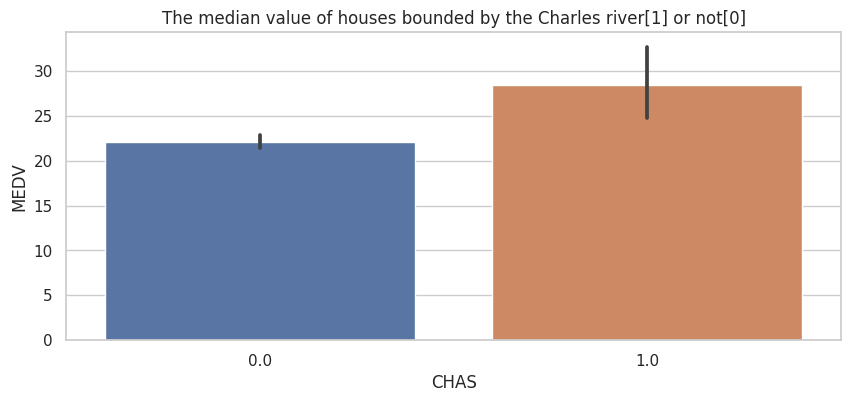

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(10,4))
plt.title("The median value of houses bounded by the Charles river[1] or not[0]")
sns.barplot(x='CHAS',y='MEDV',data=boston_df)

**Observation:** While it is visually noticeable that the median value (MEDV) of houses bounded by the Charles River is higher than that of those not bounded, we need to determine if this difference is statistically significant.Therefore, the question remains: Is this difference statistically significant?

Since we're comparing two samples for the same variable, we need to combine both **Lavene** and **T-test** to answer this question.

### Applying T-test
- H0: There is no difference in the median value of houses bounded by the Charles river
- H1: There is a difference in the median value of houses bounded by the Charles river

In [7]:
import scipy
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the obtained P-value is less than 0.05, we **reject** the null hypothesis (H0*), and we conclude that there is a statistical difference in the variance between the two samples.

In [8]:
# Applying the T-test on the two initial hypothtesis
# Setting the equal_var parameter to True since we proved the variance inequality
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)
#obtained p-value= 7.390623170519905 * 10^^-5

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion** : Since the p-value is less than alpha value 0.05, we **reject** the null hypothesis (H0) as there is enough proof that there is a statistical difference in the median value of houses bounded by the Charles river or not.

## **1.2.**     Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?<a class="anchor" id="3.2"></a>

Boxplot


In [9]:
boston_df.loc[(boston_df['AGE']<=35),'age']='35 and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age']='between 35 and 70'
boston_df.loc[boston_df['AGE']>=70,'age']='70 and older'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


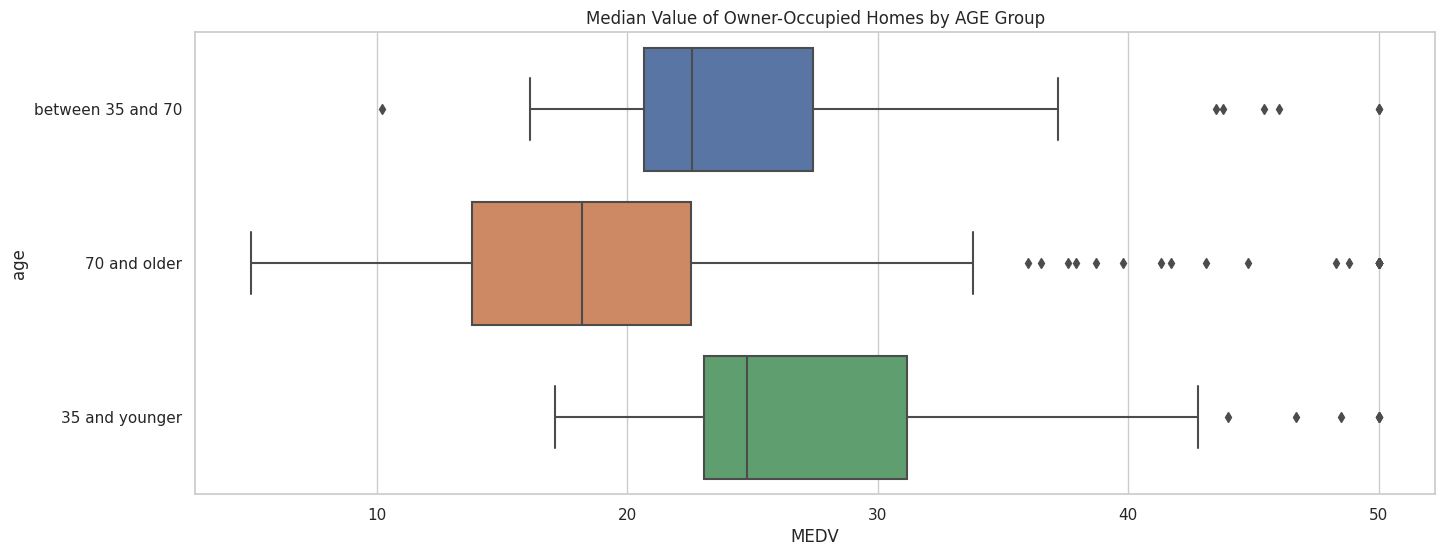

In [10]:
#boxplot
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='MEDV', y='age', data=boston_df)
plt.title("Median Value of Owner-Occupied Homes by AGE Group")
plt.show()

**Observation:** We can observe that the MEDV values of the three samples are significantly different from each other. However, to rule out the possibility that these differences are due to chance, we will perform an **ANOVA** test. This statistical test is designed to compare the means of multiple samples (more than two) for a single variable, allowing us to determine whether the observed differences are statistically significant.

**Applying the ANOVA test :**

H0: there is no difference in median values of houses of each proportion of owner-occupied units built before 1940

H1: there is a significant difference in median values of houses of each proportion of owner-occupied units built before 1940



In [11]:
a35_younger=boston_df[boston_df['age']=='35 and younger']['MEDV']
between_35_70=boston_df[boston_df['age']=='between 35 and 70']['MEDV']
a70_older=boston_df[boston_df['age']=='70 and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(a35_younger, between_35_70, a70_older)
print('The f_statistic value obtained from the ANOVA test :'+str(f_statistic)+', and the P-value obtained is :'+str(p_value) )


The f_statistic value obtained from the ANOVA test :36.40764999196599, and the P-value obtained is :1.7105011022702984e-15


**CONCLUSION:** If we obtain a p-value less than 0.05 in the ANOVA test, it would indicate that at least one of the samples has a significantly different mean value for the MEDV variable, as compared to the others. This result would lead us to reject the null hypothesis and accept the alternative hypothesis, which suggests that there are differences in the mean values of the MEDV variable across the samples.

## **1.3.** Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? <a class="anchor" id="3.3"></a>
Before conducting the test, we are providing a **regression plot** for the NOX variable vs the INDUS variable.

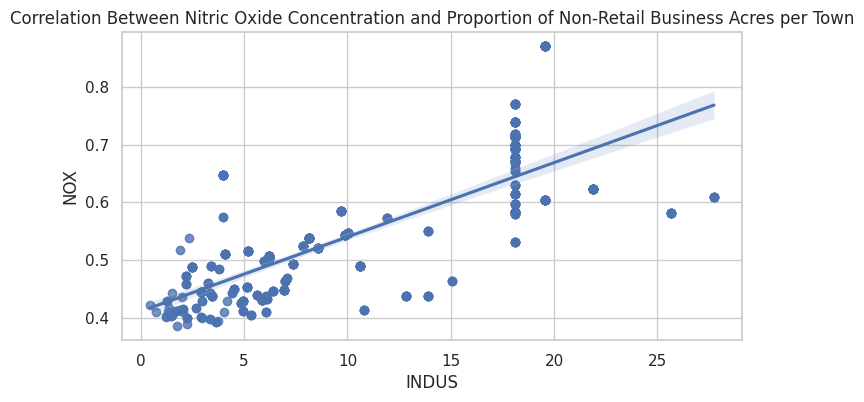

In [12]:
import scipy
plt.figure(figsize=(8,4))
sns.regplot(x='INDUS',y='NOX',data=boston_df)
plt.title("Correlation Between Nitric Oxide Concentration and Proportion of Non-Retail Business Acres per Town")
plt.show()

**Observation:** Although there appears to be a positive correlation between the two variables, we can further investigate this relationship by conducting a **Pearson** correlation test, which also gives us a **correlation coefficient**.

### **Applying correlation test**

H0: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

H1: There a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

In [14]:
#In this case we are doing a correlation test between the two variables NOX and INDUS
#Since the dependant variable is continious, we are going to perform a Pearson test that has a p-value as one of its outputs
a,p=scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("The p-value obtained from the Pearson test is "+str(p)+", with a correlation coefficient of "+str(a))

The p-value obtained from the Pearson test is 7.913361061239527e-98, with a correlation coefficient of 0.7636514469209151


**CONCLUSION:** The null hyptohesis is rejected since there are enough proof that the Nitric oxide concentration and the proportion of non-retail business acres are positively correlated

## **1.4. Regression in place of correlation test (Q4):**   What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?  <a class="anchor" id="4"></a>

In [13]:
# We can answer this question using a regression model
import statsmodels.api as sm
import math
#the independant variable
X = boston_df['DIS']
#add an intercept (beta_0) to our model
X = sm.add_constant(X)
# Dependant variable
Y=boston_df['MEDV']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        08:33:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# R-squared is the correlation_coeffecient**2
correlation_coef=math.sqrt(0.062)
print("The correlation coef is: "+str(correlation_coef))
# Since sqrt(0.062)

NameError: ignored

**CONCLUSION:** We can see that the coefficient for the additional weighted distance to the five Boston employment centers (DIS) is 1.0916, indicating that for each unit increase in the additional weighted distance, the median value of owner-occupied homes increases by 1,091.6.